In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# setting styles for plotting
sns.set_style('white')
sns.set_context('talk')

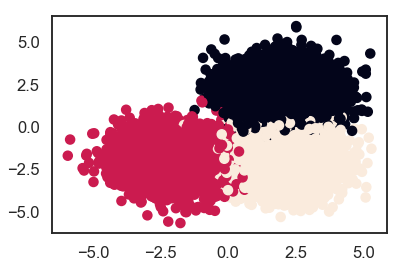

In [3]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [4]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


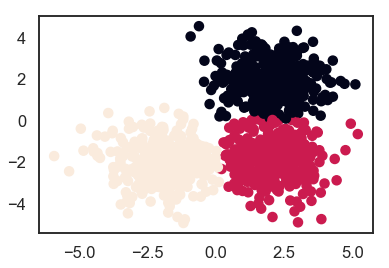

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

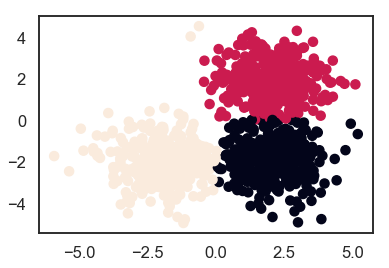

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       10  350    2
1        9    1  310
2      305    7    6


In [6]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [7]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 93


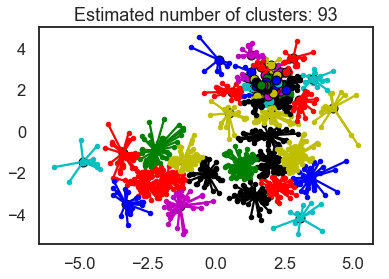

In [8]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=27)

km = kmeans.fit(X_train)

# Coordinates of the cluster centers.
cluster_centers = km.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 93


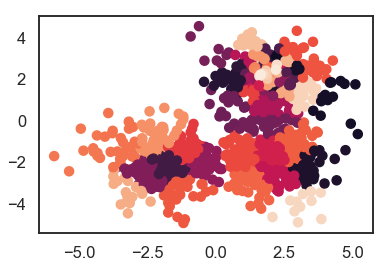

Comparing the assigned categories to the ones in the data:
col_0  0   1   2   3   4   5   6   7   8   9  ...  83  84  85  86  87  88  89  \
row_0                                         ...                               
0       1   1   2   1   6  11   8   0   3  22 ...   1   1   1  25   0   1   2   
1       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2       0   0   0   0   0   3   0  30   0   0 ...   0   0   0   0  11   0   0   

col_0  90  91  92  
row_0              
0       1   1   1  
1       0   0   0  
2       0   0   0  

[3 rows x 93 columns]


In [10]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

### 5 Blobs

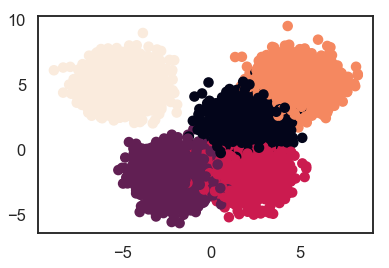

In [11]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2],[5,5],[-5,5]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [12]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


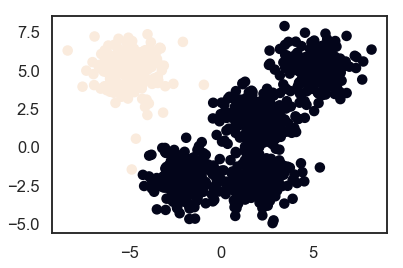

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      220    1
1      201    2
2      191    0
3      187    0
4        0  198


In [13]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

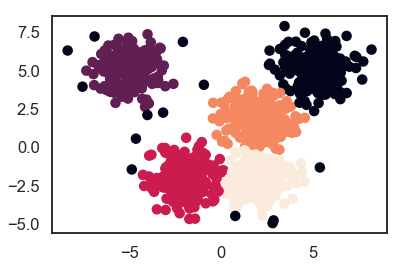

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        3    0    0  217    1
1        2    0  196    1    4
2        4    0    8    5  174
3      187    0    0    0    0
4        6  192    0    0    0


In [14]:
# We know we're looking for three clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [15]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 19


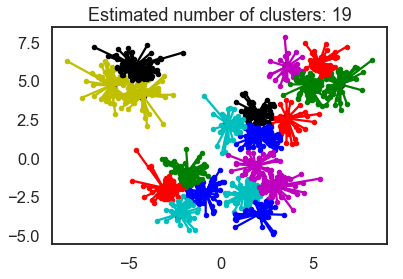

In [16]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

In [17]:
kmeans = KMeans(n_clusters=5, random_state=27)

km = kmeans.fit(X_train)

# Coordinates of the cluster centers.
cluster_centers = km.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 19


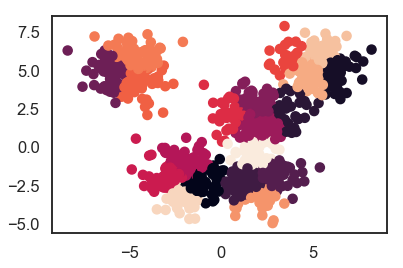

Comparing the assigned categories to the ones in the data:
col_0  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
row_0                                                                           
0       0   0  30   0   0   0  58  86   0   0  37   0   0   0   0   0   0   0   
1      49   0   0   4   0   0   0   0  60  50   1   0   0   0   0   0   0  39   
2       6   0   0  65  62   0   0   0   2   0   1   0   0   0  29   0   0   0   
3       0  47   6   0   0   0   0   0   0   0   0  30   0   0   0  63  41   0   
4       0   0   0   0   0  66   0   0   0   0   0   0  51  81   0   0   0   0   

col_0  18  
row_0      
0      10  
1       0  
2      26  
3       0  
4       0  


In [18]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

### 10 Blobs

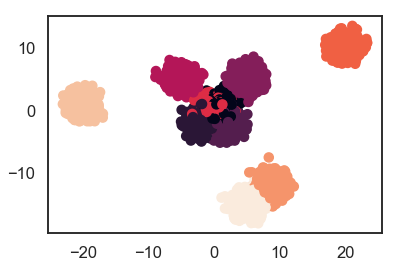

In [19]:
# The coordinates of the centers of our blobs.
centers = [[1, 0], [-2, -2], [2, -2], [5, 5], [-5, 5], [0, 0], [20, 10], [9,-12], [-20, 1], [5, -15]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [20]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


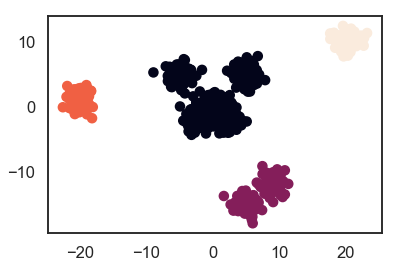

Comparing the assigned categories to the ones in the data:
col_0    0   1    2   3
row_0                  
0      112   0    0   0
1      109   0    0   0
2      101   0    0   0
3      102   0    0   0
4       88   0    0   0
5      103   0    0   0
6        0   0    0  99
7        0  88    0   0
8        0   0  110   0
9        0  88    0   0


In [21]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

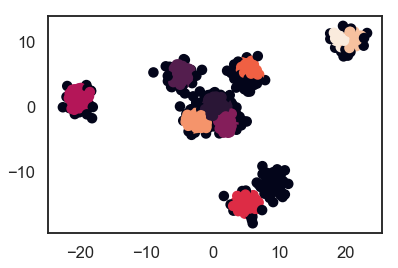

Comparing the assigned categories to the ones in the data:
col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
0      12  84   0  15   0   0   0   1   0   0
1      15   6   0   0   0   0   0  88   0   0
2      12   6   0  83   0   0   0   0   0   0
3      54   0   0   0   0   0  48   0   0   0
4      19   0  69   0   0   0   0   0   0   0
5      17  76   0   4   0   0   0   6   0   0
6      22   0   0   0   0   0   0   0  48  29
7      88   0   0   0   0   0   0   0   0   0
8      14   0   0   0  96   0   0   0   0   0
9      11   0   0   0   0  77   0   0   0   0


In [22]:
# We know we're looking for three clusters.
n_clusters=10

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [23]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 221


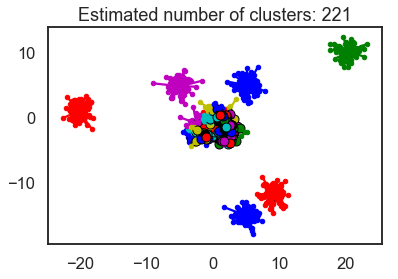

In [24]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

In [25]:
kmeans = KMeans(n_clusters=10, random_state=27)

km = kmeans.fit(X_train)

# Coordinates of the cluster centers.
cluster_centers = km.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 221


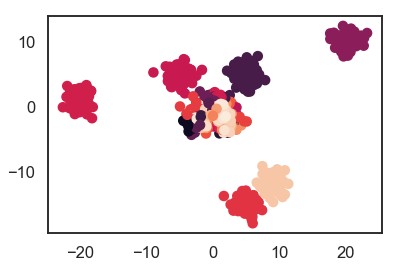

Comparing the assigned categories to the ones in the data:
col_0  0    1    2    3    4    5    6    7    8    9   ...   211  212  213  \
row_0                                                   ...                   
0        0    1    0    1    0    1    0    0    0    0 ...     1    0    1   
1        0    2    0    0    0    0    0   12    0    0 ...     0    1    0   
2        1    0    1    0    1    0    1    0    0    1 ...     0    0    0   
3        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
4        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
5        0    2    0    0    0    0    0    0    1    0 ...     0    0    4   
6        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
7        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
8        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
9        0    0    0    0    0    0    0    0    0    0 ...     0    0  

In [26]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

### 8 Blobs

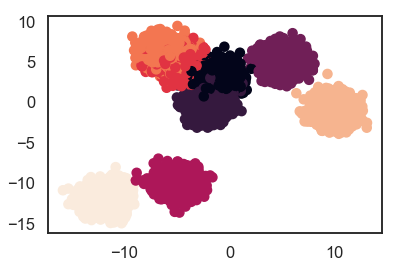

In [27]:
# The coordinates of the centers of our blobs.
centers = [[-1, 3], [-2, 0], [5, 5], [-5, -10], [-5, 5], [-6, 6], [10, -1], [-12,-12]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [28]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


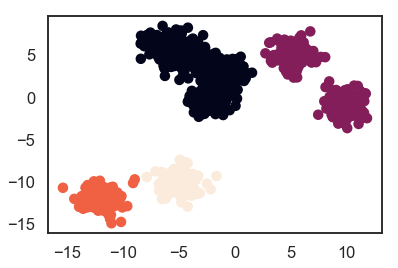

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      138    0    0    0
1      135    0    0    0
2        0  129    0    0
3        0    0    1  109
4      124    0    0    0
5      114    0    0    0
6        0  140    0    0
7        0    0  110    0


In [29]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

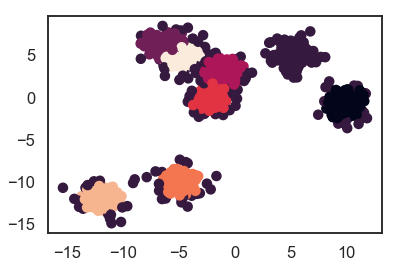

Comparing the assigned categories to the ones in the data:
col_0    0    1   2    3    4   5   6   7
row_0                                    
0        0   15   0  118    5   0   0   0
1        0   21   0    3  111   0   0   0
2        0  129   0    0    0   0   0   0
3        0   24   0    0    0  86   0   0
4        0   13  22    0    0   0   0  89
5        0   10  77    0    0   0   0  27
6      123   17   0    0    0   0   0   0
7        0   17   0    0    0   0  93   0


In [30]:
# We know we're looking for three clusters.
n_clusters=8

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [31]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 155


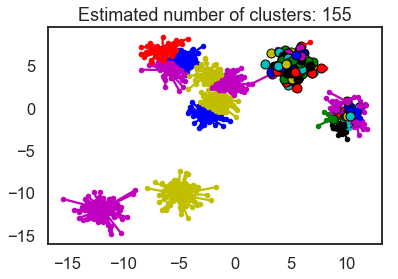

In [32]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

In [33]:
kmeans = KMeans(n_clusters=8, random_state=27)

km = kmeans.fit(X_train)

# Coordinates of the cluster centers.
cluster_centers = km.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 155


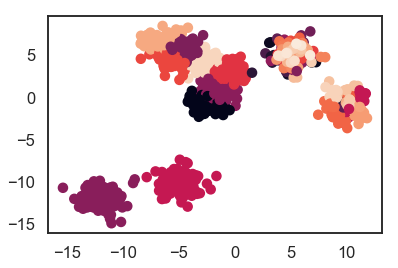

Comparing the assigned categories to the ones in the data:
col_0  0    1    2    3    4    5    6    7    8    9   ...   145  146  147  \
row_0                                                   ...                   
0        0    0    0    0    0    0    0    0    0    0 ...    33    0    0   
1       65    0    0    0    0    0    0    0    0    0 ...     0    0    0   
2        0    1    1    2    1    2    1    0    1    1 ...     0    1    1   
3        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
4        0    0    0    0    0    0    0    0    0    0 ...    11    0    0   
5        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
6        0    0    0    0    0    0    0    1    0    0 ...     0    0    0   
7        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   

col_0  148  149  150  151  152  153  154  
row_0                                     
0        0    0    0    0    0    0    0  
1        0    0    0 

In [34]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))